In [1]:
!date
!pwd

Срд Янв 18 21:22:00 MSK 2017
/home/sphere/github/Sphere/SelectEAS


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import math as mt
import numpy as np

### Чтение данных

In [6]:
# чтение данных обработки экспериментальных событий как сигнала
rsignal = pd.read_csv('Result-Signal', index_col=0, sep='\s+')
print('events as signal:', len(rsignal))

# чтение данных обработки экспериментальных событий как шума
rnoise = pd.read_csv('Result-Noise', index_col=0, sep='\s+')
print('events as noise :', len(rnoise))

# слияние массивов
all=pd.merge(rsignal,rnoise,  suffixes=('_s','_n'), left_index=True, right_index=True, how='outer')
print('events in total :',len(all))
all[:3]

events as signal: 1911
events as noise : 1911
events in total : 1911


,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n
nev,,,,,,,,,,,,
10675,107.21170,381.888,3.562,31,0.204204,0.766965,34,37.680380,375.485,9.965,1.802776,32
10677,13.49221,719.364,53.317,51,0.486947,1.157275,56,0.497918,249.740,501.569,1.519109,13
10679,0.10180,61.124,600.431,9,1.193805,2.939874,14,0.077615,218.918,2820.565,1.058301,25


In [28]:
# чтение событий ШАЛ по версии Димы
dima = pd.read_csv('timur2013.csv', header = 0, index_col=2, sep='\s+')
eas  = pd.core.frame.DataFrame(dima, columns=['EAS'])
eas['EAS'] = int(1)
# добавляем признак ШАЛ к данным
data=all.join(eas)
# заменяем NAN на 0
data.fillna(0, inplace=True)
param=['EAS','SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s','TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n'] 
data = data[param]
data[:3]

,EAS,SNRatio_s,SNRatio_n,AbsSignal_s,AbsSignal_n,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n
nev,,,,,,,,,,,,,
10675,1.0,107.21170,37.680380,381.888,375.485,3.562,9.965,31,0.204204,0.766965,1.802776,34,32
10677,1.0,13.49221,0.497918,719.364,249.740,53.317,501.569,51,0.486947,1.157275,1.519109,56,13
10679,0.0,0.10180,0.077615,61.124,218.918,600.431,2820.565,9,1.193805,2.939874,1.058301,14,25


## Построение распределений критериев для всех событий

In [29]:
# 12 параметров
param=['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s','TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n'] 
len(param)

12

In [30]:
# посмотрим кадры с большой суммой сигнала
len(all[:][all['AbsSignal_s'] > 5000])

11

In [31]:
# Посмотрим на кадр 11048: в нем суммарный сигнал очень большой (дверь)
all[all['AbsSignal_s']> 100000]

,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n
nev,,,,,,,,,,,,
11048,30.78734,133382.3,4332.375,3,1.083849,2.0,12,0.0234,33.064,1413.01,0.816497,6


In [32]:
#Выбросим кадр 11048: он заведомо шумовой, в нём суммарный сигнал очень большой (дверь)
show=data[data['AbsSignal_s'] < 100000]
len(show)

1910

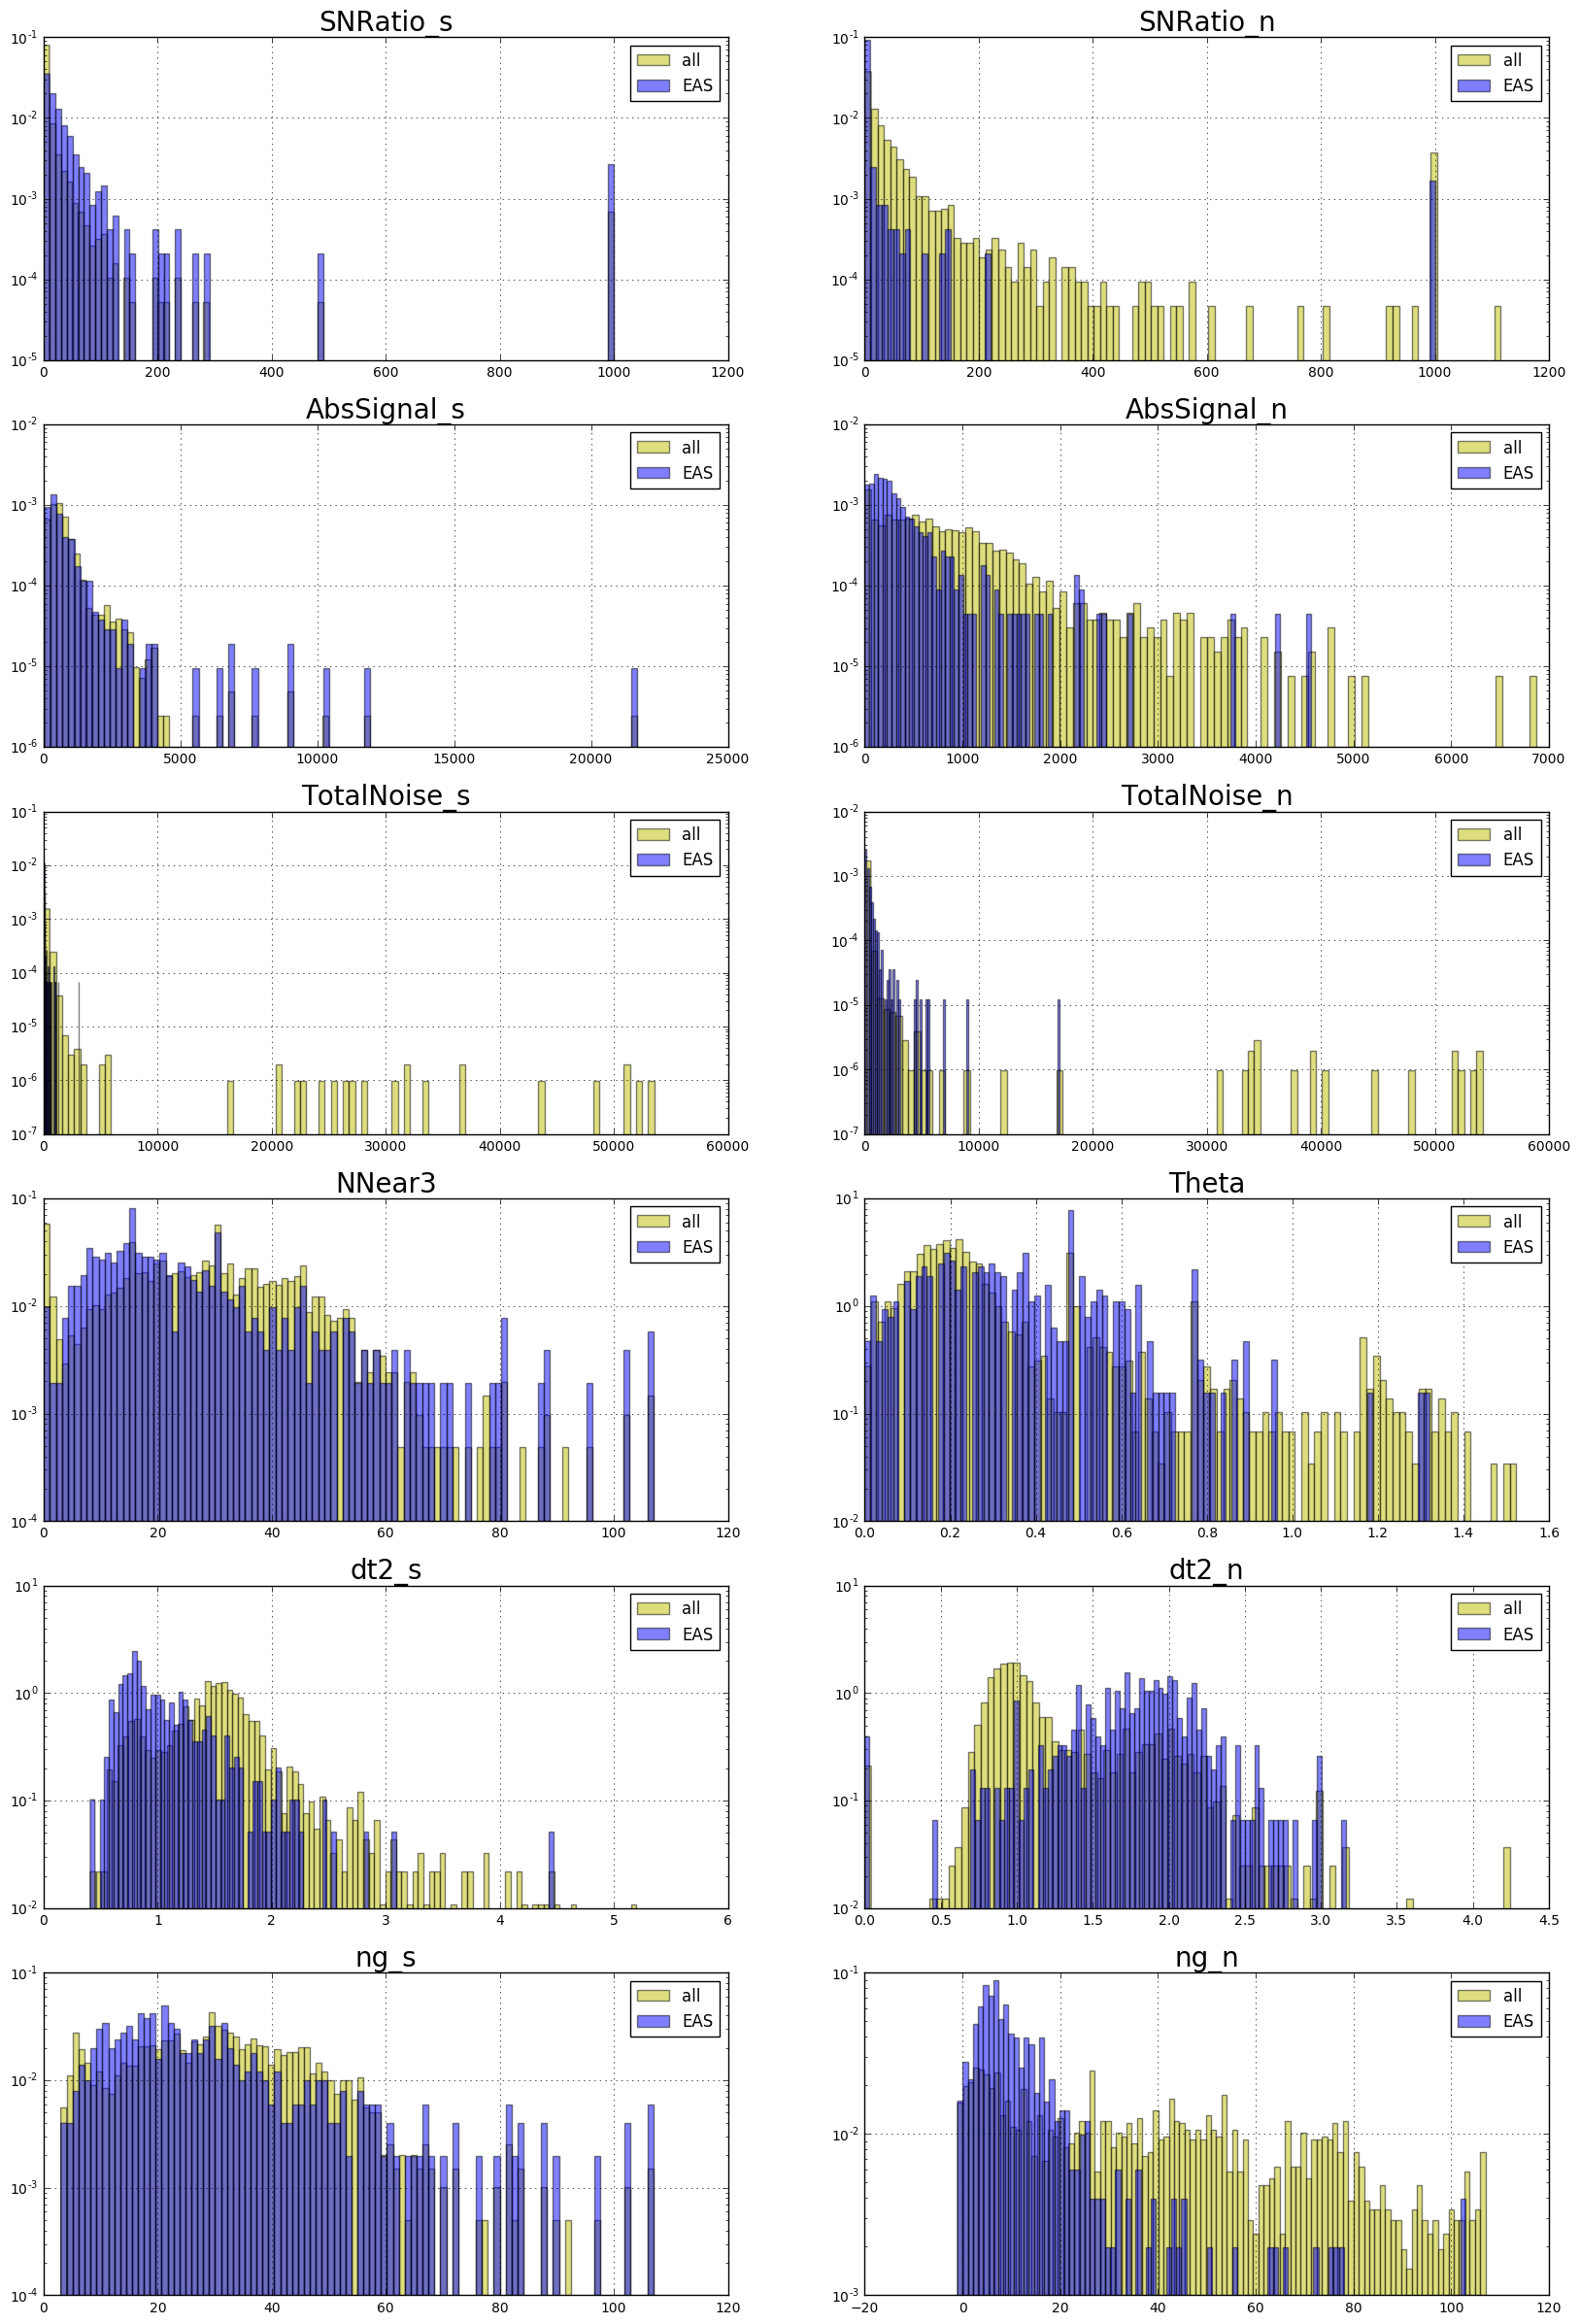

In [33]:
plt.figure(figsize=(20,30))
param=['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s','TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n'] 
for i in range(len(param)):
    plt.subplot(6,2,1+i)
    plt.hist(show[param[i]],                 bins = 100, alpha = 0.5, color = 'y', label=r"all", normed=True)
    plt.hist(show[param[i]][show['EAS']==1], bins = 100, alpha = 0.5, color = 'b', label=r"EAS", normed=True)
    plt.title(param[i], size = 20)
    plt.legend(loc=1)
    plt.yscale('log')
    plt.grid()

In [34]:
# считаем корреляции
#help(data.corr())
data.corr(method='pearson')

,EAS,SNRatio_s,SNRatio_n,AbsSignal_s,AbsSignal_n,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n
EAS,1.000000,0.270871,-0.171614,0.001678,-0.330809,-0.094508,-0.016862,-0.120831,0.100352,-0.496486,0.597440,-0.106476,-0.533730
SNRatio_s,0.270871,1.000000,-0.023982,0.023665,-0.077316,-0.032480,-0.001702,0.002184,0.028694,-0.145292,0.174122,0.005845,-0.155301
SNRatio_n,-0.171614,-0.023982,1.000000,0.008242,0.208567,-0.028620,-0.054421,0.121605,-0.153730,0.027179,-0.173779,0.107656,0.221327
AbsSignal_s,0.001678,0.023665,0.008242,1.000000,0.170246,0.018461,0.024763,0.151436,0.021829,-0.000270,-0.026809,0.159165,0.063759
AbsSignal_n,-0.330809,-0.077316,0.208567,0.170246,1.000000,-0.010642,-0.066183,0.631661,-0.416593,0.056324,-0.349733,0.612215,0.748454
TotalNoise_s,-0.094508,-0.032480,-0.028620,0.018461,-0.010642,1.000000,0.956699,0.091591,0.283171,0.177175,0.015477,0.111452,0.070022
TotalNoise_n,-0.016862,-0.001702,-0.054421,0.024763,-0.066183,0.956699,1.000000,0.106661,0.336099,0.148659,0.080927,0.130777,-0.011609
NNear3,-0.120831,0.002184,0.121605,0.151436,0.631661,0.091591,0.106661,1.000000,-0.379336,-0.089013,-0.239072,0.993276,0.723815
Theta,0.100352,0.028694,-0.153730,0.021829,-0.416593,0.283171,0.336099,-0.379336,1.000000,0.535947,0.379329,-0.339556,-0.519484
dt2_s,-0.496486,-0.145292,0.027179,-0.000270,0.056324,0.177175,0.148659,-0.089013,0.535947,1.000000,-0.136961,-0.065010,0.135520


##### параметры в порядке уменьшения модуля корреляции с EAS
'dt2_n', 'ng_n','dt2_s', 'AbsSignal_n', 'SNRatio_s', 'SNRatio_n', 'NNear3', 'ng_s','Theta', 'TotalNoise_s', 'TotalNoise_n', 'AbsSignal_s'

In [59]:
# параметры в порядке уменьшения модуля корреляции с EAS
# param = ['EAS', 'dt2_n', 'ng_n','dt2_s', 'AbsSignal_n', 'SNRatio_s', 'SNRatio_n', 'NNear3', 'ng_s','Theta']
param = ['EAS', 'dt2_n', 'ng_n','dt2_s', 'AbsSignal_n', 'SNRatio_s', 'SNRatio_n']
sixx = data[param]
sixx.corr()
#sixx.corr(method='kendall')
cor=sixx.corr(method='spearman')
cor=cor['EAS']
print (cor)

EAS            1.000000
dt2_n          0.593292
ng_n          -0.554247
dt2_s         -0.572526
AbsSignal_n   -0.435603
SNRatio_s      0.626474
SNRatio_n     -0.533277
Name: EAS, dtype: float64


# Попарные распределения по признакам

In [35]:
param = ['EAS', 'dt2_n', 'ng_n','dt2_s', 'AbsSignal_n', 'SNRatio_s', 'SNRatio_n']
features = param [1:]
Xset = sixx[features]
Yset = sixx['EAS']
target_names = ['Noise','EAS']
print('all:',len(Xset))
print('EAS:',len(Xset[Yset==1]))

all: 1911
EAS: 482


In [36]:
# Построим все попарные распределения по признакам
duo = [[i,j] for j in range(6) for i in range(6)]

# Parameters
n_classes = 2
plot_colors = "yb"
y = Yset

In [37]:
# удалим выбросы
six = data[param][data['SNRatio_s'] < 120]
si1 = six[six['AbsSignal_n'] < 6000]
six = si1[si1['SNRatio_n']   < 700]
Xset = six[features]
Yset = six['EAS']
print('all:',len(Xset))
print('EAS:',len(Xset[Yset==1]))

all: 1797
EAS: 447


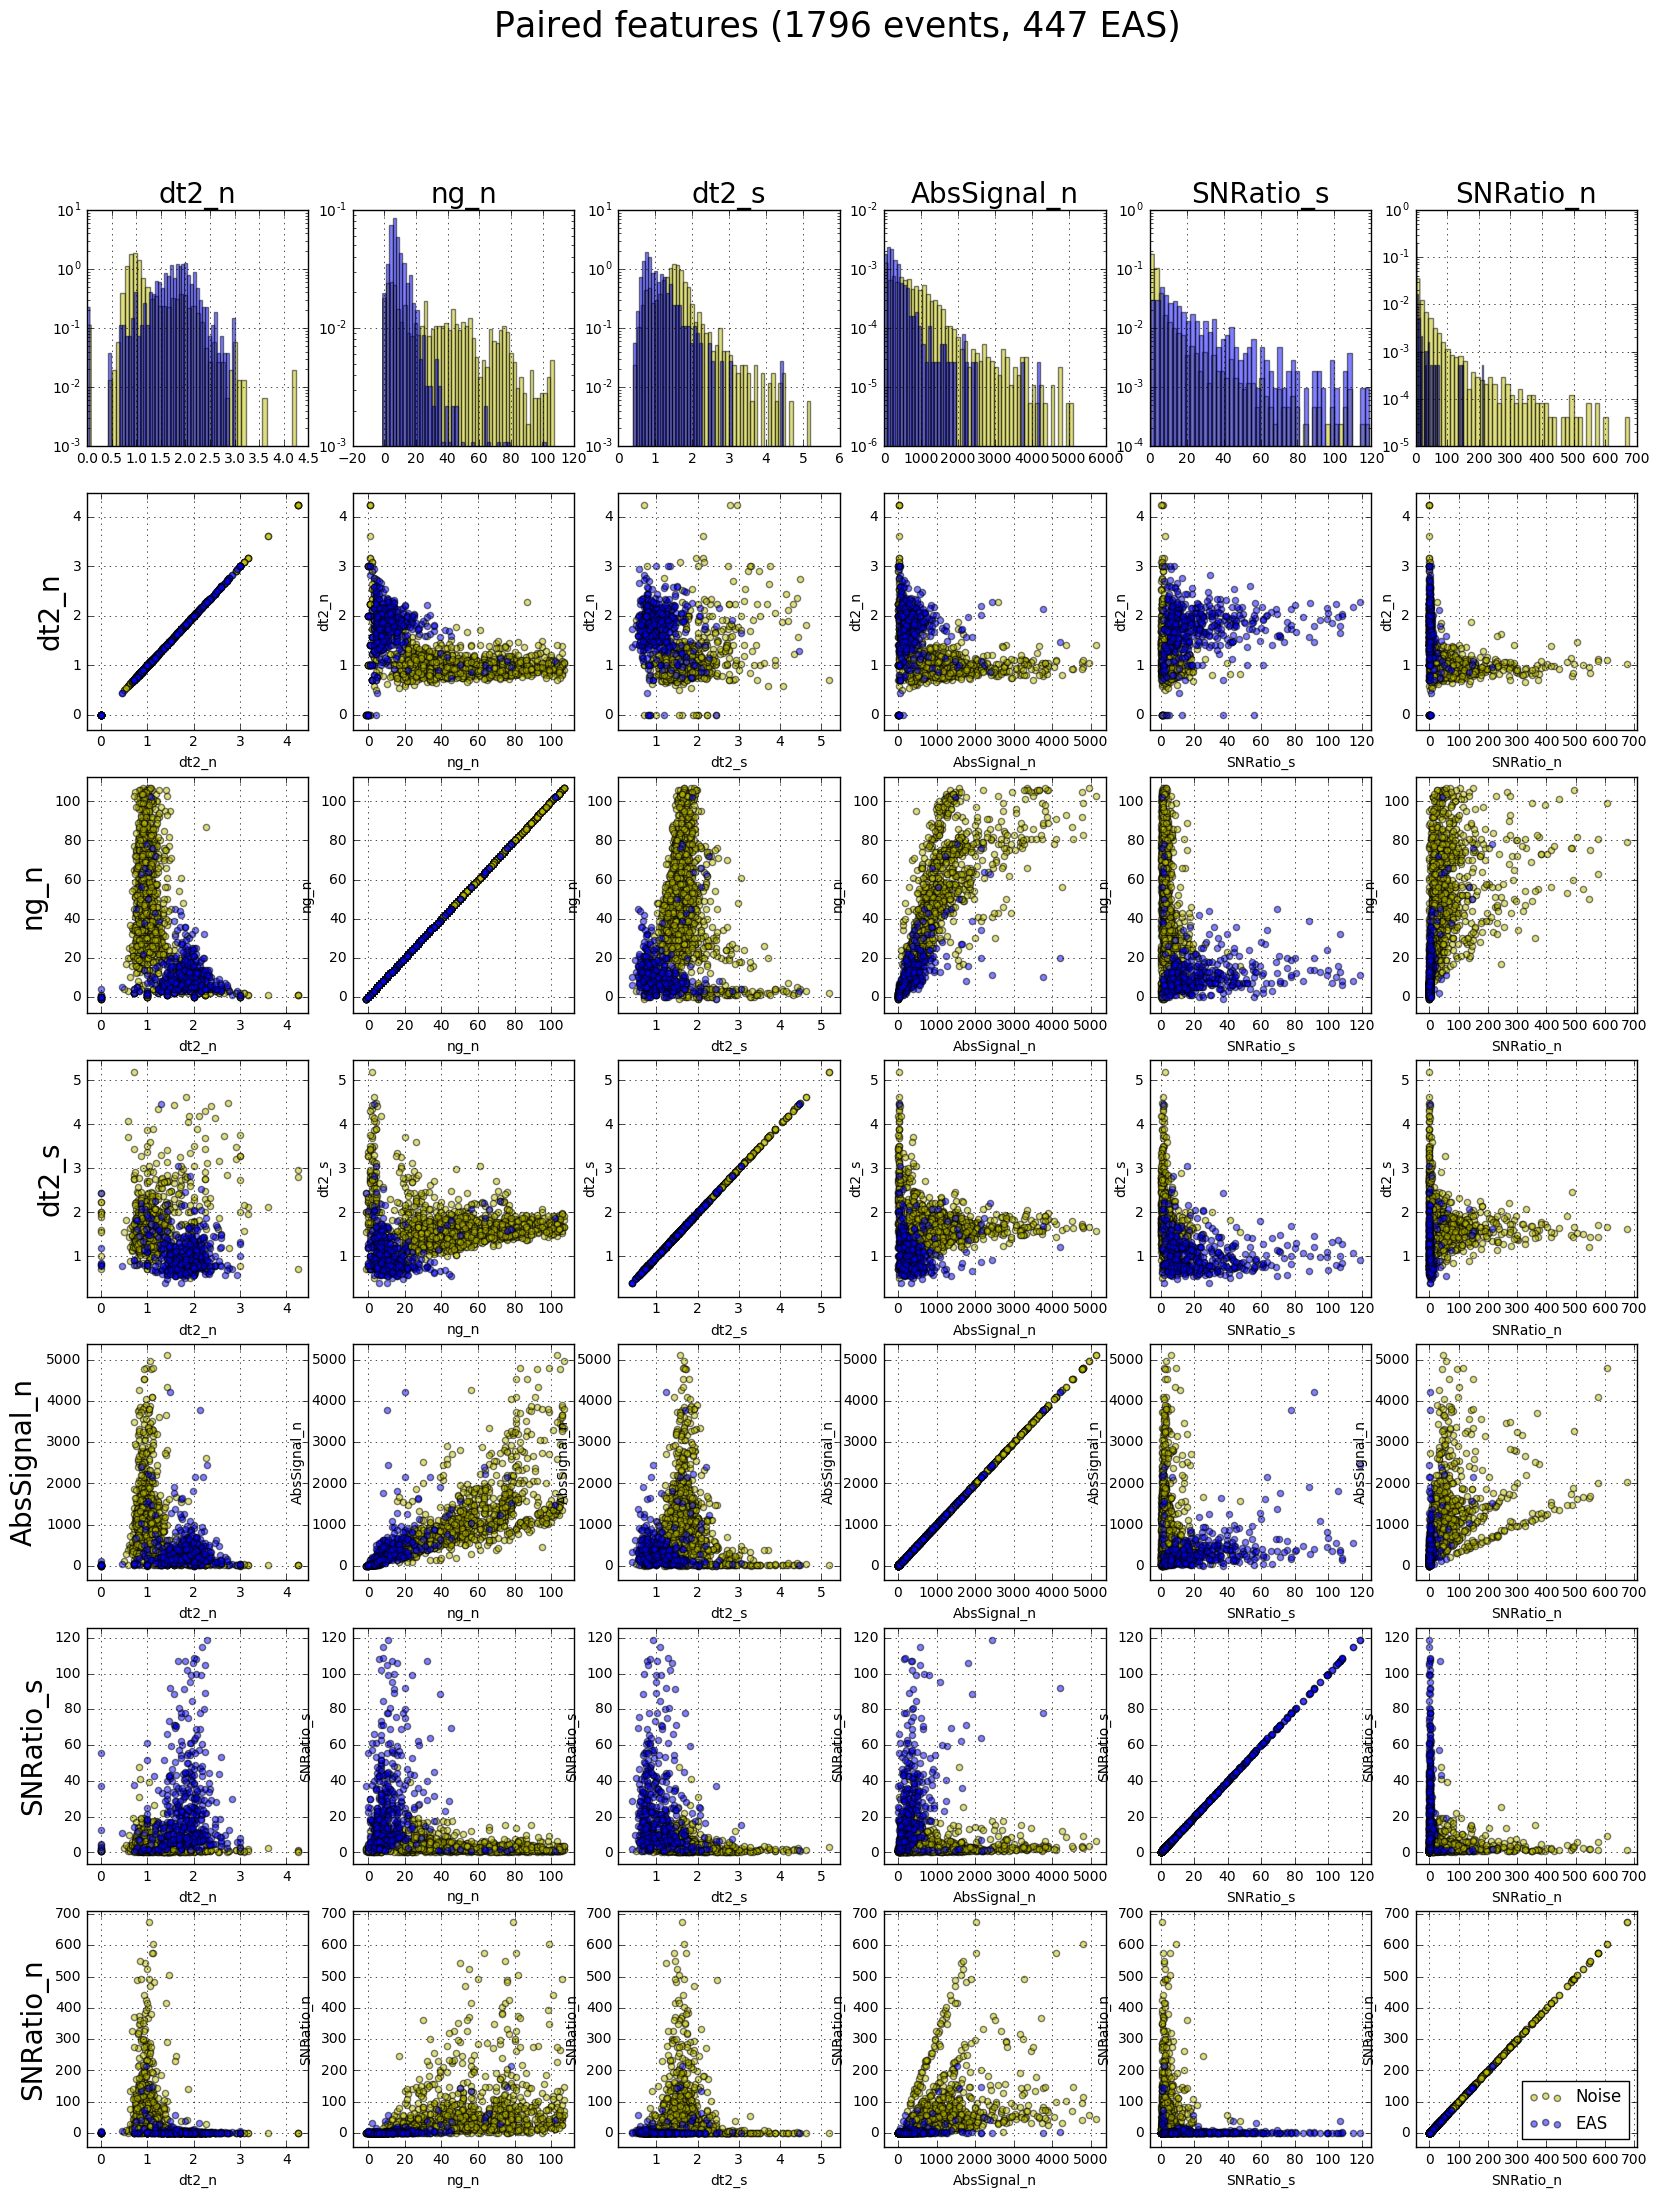

In [42]:
# построим еще раз все попарные распределения по признакам с отрезанными выбросами
plt.figure(figsize=(20,25))

for i in range(len(param)-1):
    plt.subplot(7,6,1+i)
    plt.hist(Xset[features[i]],          bins = 50, alpha = 0.5, color = 'y', label=r"all", normed=True)
    plt.hist(Xset[features[i]][Yset==1], bins = 50, alpha = 0.5, color = 'b', label=r"EAS", normed=True)
    plt.title(features[i], size = 20)
    plt.yscale('log')
    #plt.axis("tight")
    plt.grid()

for pairidx, pair in enumerate(duo):   
    plt.subplot(7, 6, pairidx + 7)
    
    # We only take the two corresponding features
    X = Xset[pair]
    y = Yset

    # Plot points
    for i, color in zip(range(n_classes), plot_colors):
        plt.scatter(X[features[pair[0]]][y == i], X[features[pair[1]]][y == i], 
                    c=color, label=target_names[i], cmap=plt.cm.Paired, 
                    alpha = 0.5 )

    plt.xlabel(features[pair[0]])
    plt.ylabel(features[pair[1]])
    if(pairidx%6 == 0):
        plt.ylabel(features[pair[1]], size = 20)
    plt.axis("tight")
    plt.grid()

plt.suptitle("Paired features (1796 events, 447 EAS)", size=25)
plt.legend(loc=4)
plt.show()

# Методы ML

## Метод решающих деревьев

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
#param = ['EAS', 'dt2_n', 'ng_n','dt2_s', 'AbsSignal_n', 'SNRatio_s', 'SNRatio_n']
param = ['EAS', 'dt2_n','ng_n', 'dt2_s', 'AbsSignal_n', 'SNRatio_s', 'SNRatio_n', 'NNear3', 'ng_s','Theta','TotalNoise_s','AbsSignal_s','TotalNoise_n']
four = data[param]
four.corr()

,EAS,dt2_n,ng_n,dt2_s,AbsSignal_n,SNRatio_s,SNRatio_n,NNear3,ng_s,Theta,TotalNoise_s,AbsSignal_s,TotalNoise_n
EAS,1.000000,0.597348,-0.534300,-0.496365,-0.331230,0.270948,-0.171756,-0.121394,-0.106900,0.101413,-0.094245,0.047473,-0.016807
dt2_n,0.597348,1.000000,-0.518792,-0.136642,-0.350326,0.174228,-0.173991,-0.239951,-0.210060,0.381389,0.015908,-0.028472,0.081025
ng_n,-0.534300,-0.518792,1.000000,0.136092,0.748309,-0.155255,0.221176,0.723594,0.704391,-0.519064,0.070638,0.292659,-0.011501
dt2_s,-0.496365,-0.136642,0.136092,1.000000,0.056793,-0.145394,0.027361,-0.088394,-0.064505,0.535901,0.176822,-0.062005,0.148604
AbsSignal_n,-0.331230,-0.350326,0.748309,0.056793,1.000000,-0.077249,0.208422,0.631411,0.611974,-0.416088,-0.010138,0.635707,-0.066102
SNRatio_s,0.270948,0.174228,-0.155255,-0.145394,-0.077249,1.000000,-0.023948,0.002322,0.005954,0.028509,-0.032573,0.066291,-0.001718
SNRatio_n,-0.171756,-0.173991,0.221176,0.027361,0.208422,-0.023948,1.000000,0.121364,0.107448,-0.153470,-0.028426,0.055884,-0.054384
NNear3,-0.121394,-0.239951,0.723594,-0.088394,0.631411,0.002322,0.121364,1.000000,0.993298,-0.378068,0.092467,0.614217,0.106885
ng_s,-0.106900,-0.210060,0.704391,-0.064505,0.611974,0.005954,0.107448,0.993298,1.000000,-0.338590,0.112147,0.615384,0.130951
Theta,0.101413,0.381389,-0.519064,0.535901,-0.416088,0.028509,-0.153470,-0.378068,-0.338590,1.000000,0.282399,-0.128931,0.336510


In [39]:
features = param [1:]
X = data[features]
print('events', len(X))
X[:3]

events 1911


,dt2_n,ng_n,dt2_s,AbsSignal_n,SNRatio_s,SNRatio_n
nev,,,,,,
10675,1.802776,32,0.766965,375.485,107.21170,37.680380
10677,1.519109,13,1.157275,249.740,13.49221,0.497918
10679,1.058301,25,2.939874,218.918,0.10180,0.077615


In [40]:
Y = data['EAS']
len(Y)

1911

In [55]:
# Обучим решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию.
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=241, splitter='best')

In [57]:
# Вычислим важности признаков и найдем признаки с наибольшей важностью. 
importances = clf.feature_importances_
for i in range(len(importances)):
    print(features[i],'\t',importances[i])

dt2_n 	 0.525752653915
ng_n 	 0.0583850633036
dt2_s 	 0.0401371405095
AbsSignal_n 	 0.00208122668154
SNRatio_s 	 0.22062939697
SNRatio_n 	 0.0281319631363
NNear3 	 0.000914093236633
ng_s 	 0.0126089326463
Theta 	 0.0299176777111
TotalNoise_s 	 0.00409153011466
AbsSignal_s 	 0.0638608895804
TotalNoise_n 	 0.0134894321952


### Построение дерева

In [58]:
clf.decision_path(X)

<1910x113 sparse matrix of type '<class 'numpy.int64'>'
	with 16261 stored elements in Compressed Sparse Row format>

In [59]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot')  

In [60]:
# create png
from IPython.display import Image  
import pydotplus 

target_names = ['Noise','EAS']
dot_data = tree.export_graphviz(clf, out_file=None, 
                feature_names=features,  
                class_names=target_names,  
                filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
#Image(graph.create_png())  

In [34]:
#graph.write_pdf("tree.pdf")

In [ ]:
#graph.write_png("tree.png")

### Уменьшим количество признаков

In [61]:
features = param [1:6]
X = data[features]
Y = data['EAS']
# Обучим решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию.
clf = DecisionTreeClassifier(random_state=20,max_leaf_nodes=8, min_samples_leaf=2)
clf.fit(X, Y)
# Вычислим важности признаков и найдем признаки с наибольшей важностью. 
importances = clf.feature_importances_
for i in range(len(importances)):
    print(features[i],'\t',importances[i])

dt2_n 	 0.597509623184
ng_n 	 0.0854053363492
dt2_s 	 0.0302861455141
AbsSignal_n 	 0.0
SNRatio_s 	 0.286798894953


In [38]:
# построим дерево по 5 признакам
clf.decision_path(X)
tree.export_graphviz(clf, out_file='tree.dot')  
target_names = ['Noise','EAS']
dot_data = tree.export_graphviz(clf, out_file=None, 
                feature_names=features,  
                class_names=target_names,  
                filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree5-8-2.png")
#graph.write_pdf("tree5-8-2.pdf")
#Image(graph.create_png())  

# ESLE

In [39]:
clf.score(X,Y)

0.97120418848167545

In [40]:
clf.apply(X)

array([ 9,  9, 12, ..., 12, 12, 12])

In [41]:
XX = clf._validate_X_predict(X, check_input=True)

#tr = clf.tree_.decision_path(XX)
print(XX)

[[  1.80277598e+00   3.20000000e+01   7.66964972e-01   3.75484985e+02
    1.07211700e+02]
 [  1.51910901e+00   1.30000000e+01   1.15727496e+00   2.49740005e+02
    1.34922104e+01]
 [  1.05830097e+00   2.50000000e+01   2.93987393e+00   2.18917999e+02
    1.01800203e-01]
 ..., 
 [  1.06542695e+00   3.70000000e+01   1.42427897e+00   5.49817017e+02
    4.12749195e+00]
 [  9.22531188e-01   4.70000000e+01   1.17513895e+00   1.02392200e+03
    9.57330513e+00]
 [  1.00000000e+00   9.00000000e+01   1.36872900e+00   1.26865405e+03
    1.71050091e+01]]


In [44]:
Z=clf.predict_proba(X)
Z

array([[ 0.02955665,  0.97044335],
       [ 0.02955665,  0.97044335],
       [ 0.98561151,  0.01438849],
       ..., 
       [ 0.98561151,  0.01438849],
       [ 0.98561151,  0.01438849],
       [ 0.98561151,  0.01438849]])

In [45]:
len(Z[:])

1910

In [ ]:
help(DecisionTreeClassifier)

In [ ]:
print( '\nclf Attributes...' )
for atttribute in dir( clf ):
    if atttribute[0] != '_':
        print( atttribute, ':', getattr( clf , atttribute ) )